In this notebook we are going to focus on features which will be derived from time domain characteristics.

In [1]:
import numpy as np
import math
from scipy.signal import argrelextrema, find_peaks

In [2]:
path = "/Users/ecem/Desktop/phonocardiogram/data/PV/absent"

In [3]:
waves = np.load(path + "/absent_PV_waves_10sec.npy", allow_pickle= True)

In [4]:
waves.shape

(5743, 40000)

## Mean:

In [5]:
mean_ = np.zeros(waves.shape[0])

In [6]:
for i in range(waves.shape[0]):
    mean_[i] = waves[i].mean()

## Standart deviation:

In [7]:
std_ = np.zeros(waves.shape[0])
for i in range(waves.shape[0]):
    std_[i] = waves[i].std()

## Skewness

In [8]:
from scipy.stats import skew

In [9]:
skew_ = np.zeros(waves.shape[0])
for i in range(waves.shape[0]):
    skew_[i] = skew(waves[i])

## Kurtosis

In [10]:
import scipy.stats

In [11]:
kurt_ = np.zeros(waves.shape[0])
for i in range(waves.shape[0]):
    kurt_[i] =  scipy.stats.kurtosis(waves[i])

## Harmonic Mean

In [12]:
harmonic_ = np.zeros(waves.shape[0])
for i in range(waves.shape[0]):
    harmonic_[i] =  scipy.stats.hmean(waves[i]* waves[i])

## Autocorrelation

In [13]:
from scipy import signal
from scipy.signal import find_peaks

In [14]:
autocorr = signal.fftconvolve(waves[0], waves[0], mode='full')

/var/folders/gd/3d6ckpdn4q30skhxnvs_p7b80000gn/T/ipykernel_2507/835141848.py:8: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


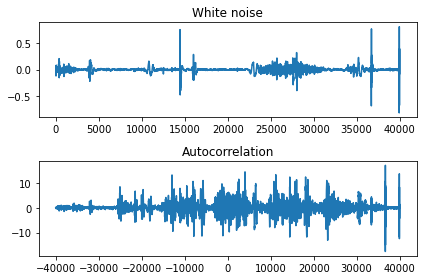

In [15]:
import matplotlib.pyplot as plt
>>> fig, (ax_orig, ax_mag) = plt.subplots(2, 1)
>>> ax_orig.plot(waves[0])
>>> ax_orig.set_title('White noise')
>>> ax_mag.plot(np.arange(-len(waves[0])+1,len(waves[0])), autocorr)
>>> ax_mag.set_title('Autocorrelation')
>>> fig.tight_layout()
>>> fig.show()

In [16]:
peaks = find_peaks(autocorr, height = 10)

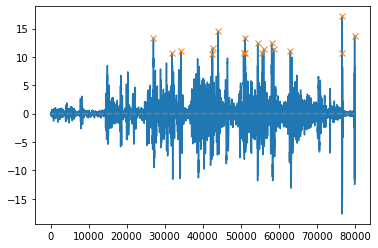

In [17]:
>>> plt.plot(autocorr)
>>> plt.plot(peaks[0], autocorr[peaks[0]], "x")
>>> plt.plot(np.zeros_like(autocorr), "--", color="gray")
>>> plt.show()

In [18]:
autocorr = signal.fftconvolve(waves[79], waves[79], mode='full')

/var/folders/gd/3d6ckpdn4q30skhxnvs_p7b80000gn/T/ipykernel_2507/759871826.py:7: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


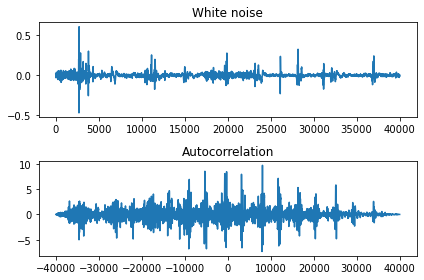

In [19]:
>>> fig, (ax_orig, ax_mag) = plt.subplots(2, 1)
>>> ax_orig.plot(waves[79])
>>> ax_orig.set_title('White noise')
>>> ax_mag.plot(np.arange(-len(waves[79])+1,len(waves[79])), autocorr)
>>> ax_mag.set_title('Autocorrelation')
>>> fig.tight_layout()
>>> fig.show()

peaks = find_peaks(autocorr, height = 10)



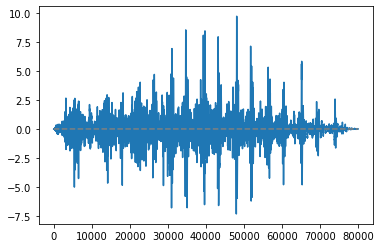

In [20]:
>>> plt.plot(autocorr)
>>> plt.plot(peaks[0], autocorr[peaks[0]], "x")
>>> plt.plot(np.zeros_like(autocorr), "--", color="gray")
>>> plt.show()

In [21]:
peaks[0].mean()

/var/folders/gd/3d6ckpdn4q30skhxnvs_p7b80000gn/T/ipykernel_2507/3284177892.py:1: RuntimeWarning: Mean of empty slice.
  peaks[0].mean()
/Users/ecem/miniforge3/envs/tf-metal/lib/python3.9/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


nan

In [22]:
auto_corr = np.zeros((waves.shape[0], 79999))
peaks_ = []
for i in range(waves.shape[0]):
    auto_corr[i,:] = signal.fftconvolve(waves[i], waves[i], mode='full')
    peaks_.append(find_peaks(auto_corr[i], height = 0)[1]["peak_heights"].mean())
    

In [23]:
peaks_ = np.array(peaks_)
peaks_.shape

(5743,)

# Now lets create their dataframes

In [24]:
import pandas as pd

In [25]:
mean_df = pd.DataFrame(mean_, columns =["mean"])
mean_df.head()

,mean
0,0.000060
1,-0.000127
2,-0.000436
3,0.000039
4,-0.000489


In [26]:
std_df = pd.DataFrame(std_, columns =["std"])
std_df.head()

,std
0,0.051926
1,0.041596
2,0.050411
3,0.053868
4,0.062604


In [27]:
kurtosis_df = pd.DataFrame(kurt_, columns = ["kurtosis"])
kurtosis_df.head()

,kurtosis
0,46.360639
1,13.449804
2,6.231265
3,9.629040
4,9.025728


In [28]:
skew_df = pd.DataFrame(skew_, columns =["skewness"])
skew_df.head()

,skewness
0,0.224776
1,0.381768
2,0.191706
3,0.265997
4,0.639131


In [29]:
harmonic_df = pd.DataFrame(harmonic_, columns =["harmonic mean"])
harmonic_df.head()

,harmonic mean
0,4.220377e-09
1,1.148357e-11
2,3.357820e-09
3,5.426495e-09
4,1.353100e-08


In [30]:
autocorr_peaks_df = pd.DataFrame(peaks_, columns =["ac peak height mean"])
autocorr_peaks_df.head()

,ac peak height mean
0,1.675080
1,1.083325
2,2.016476
3,2.184973
4,3.065880


## Now concatenate all features

In [31]:
df = pd.concat([mean_df, std_df, skew_df, kurtosis_df, harmonic_df, autocorr_peaks_df], axis =1)

In [32]:
df

,mean,std,skewness,kurtosis,harmonic mean,ac peak height mean
0,0.000060,0.051926,0.224776,46.360639,4.220377e-09,1.675080
1,-0.000127,0.041596,0.381768,13.449804,1.148357e-11,1.083325
2,-0.000436,0.050411,0.191706,6.231265,3.357820e-09,2.016476
3,0.000039,0.053868,0.265997,9.629040,5.426495e-09,2.184973
4,-0.000489,0.062604,0.639131,9.025728,1.353100e-08,3.065880
...,...,...,...,...,...,...
5738,0.000245,0.021827,0.038342,4.700422,4.918187e-10,0.314574
5739,-0.000040,0.019670,0.206827,6.390776,6.574483e-10,0.382118
5740,0.000285,0.016887,0.021545,6.245888,8.405296e-10,0.263588
5741,0.000593,0.024211,-0.016954,2.930173,8.099831e-10,0.586347


In [33]:
df.to_csv("/Users/ecem/Desktop/phonocardiogram/data/PV/absent/PV-statistical-features.csv" )